# Smart_Stock_ML: Classification

## Setup and Explore the data

In [42]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import ensemble
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt


#  Import completed dataset
sp500_company_ml_df = pd.read_csv("data/sp500_company_ml.csv")
sp500_company_ml_df.head()

,Year,Outperformed?,Interest Rate (Federal Funds Effective Rate),CPI,UnemploymentRate,GDPGrowthRate,GICS Sector,Gender,CEO Transition,Tenure Bucket,HQ_US_State_or_Country,Salary_Bucket
0,2015,1,0.11,0.1,5.3,2.9,Health Care,M,1.0,<= 2 years,California,"(15000000, 20000000]"
1,2016,1,0.34,1.3,4.9,1.8,Health Care,M,0.0,<= 2 years,California,"(15000000, 20000000]"
2,2017,1,0.65,2.1,4.4,2.5,Health Care,M,0.0,<= 2 years,California,"(15000000, 20000000]"
3,2018,1,1.41,2.4,3.9,3.0,Health Care,M,0.0,2 to 5 years,California,"(15000000, 20000000]"
4,2019,0,2.40,1.8,3.7,2.5,Health Care,M,0.0,2 to 5 years,California,"(15000000, 20000000]"


In [43]:
# View data info
sp500_company_ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4366 entries, 0 to 4365
Data columns (total 12 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Year                                          4366 non-null   int64  
 1   Outperformed?                                 4366 non-null   int64  
 2   Interest Rate (Federal Funds Effective Rate)  4366 non-null   float64
 3   CPI                                           4366 non-null   float64
 4   UnemploymentRate                              4366 non-null   float64
 5   GDPGrowthRate                                 4366 non-null   float64
 6   GICS Sector                                   4366 non-null   object 
 7   Gender                                        4366 non-null   object 
 8   CEO Transition                                4366 non-null   float64
 9   Tenure Bucket                                 4366 non-null   o

In [44]:
# Determine the number of unique values in each column.
sp500_company_ml_df.nunique()

Year                                             9
Outperformed?                                    2
Interest Rate (Federal Funds Effective Rate)     9
CPI                                              9
UnemploymentRate                                 9
GDPGrowthRate                                    7
GICS Sector                                     11
Gender                                           2
CEO Transition                                   2
Tenure Bucket                                    4
HQ_US_State_or_Country                          49
Salary_Bucket                                    7
dtype: int64

## Supervised learning: Classifiers

### Preprocessing

In [45]:
# Convert categorical data to numeric with `pd.get_dummies`
sp500_numeric_df = pd.get_dummies(sp500_company_ml_df, dtype=int).drop('Gender_M', axis=1)

In [49]:
sp500_numeric_df.columns

Index(['Year', 'Outperformed?', 'Interest Rate (Federal Funds Effective Rate)',
       'CPI', 'UnemploymentRate', 'GDPGrowthRate', 'CEO Transition',
       'GICS Sector_Communication Services',
       'GICS Sector_Consumer Discretionary', 'GICS Sector_Consumer Staples',
       'GICS Sector_Energy', 'GICS Sector_Financials',
       'GICS Sector_Health Care', 'GICS Sector_Industrials',
       'GICS Sector_Information Technology', 'GICS Sector_Materials',
       'GICS Sector_Real Estate', 'GICS Sector_Utilities', 'Gender_F',
       'Tenure Bucket_10+ years', 'Tenure Bucket_2 to 5 years',
       'Tenure Bucket_5 to 10 years', 'Tenure Bucket_<= 2 years',
       'HQ_US_State_or_Country_Alabama', 'HQ_US_State_or_Country_Arizona',
       'HQ_US_State_or_Country_Arkansas', 'HQ_US_State_or_Country_Bermuda',
       'HQ_US_State_or_Country_Bristol', 'HQ_US_State_or_Country_California',
       'HQ_US_State_or_Country_Canada', 'HQ_US_State_or_Country_Colorado',
       'HQ_US_State_or_Country_Connect

In [50]:
# Split the preprocessed data into features and target arrays
y = sp500_numeric_df['Outperformed?'].values
X = sp500_numeric_df.drop(columns=['Outperformed?'], axis=1).values
X_columns = sp500_numeric_df.drop(columns=['Outperformed?'], axis=1).columns

In [51]:
X_columns

Index(['Year', 'Interest Rate (Federal Funds Effective Rate)', 'CPI',
       'UnemploymentRate', 'GDPGrowthRate', 'CEO Transition',
       'GICS Sector_Communication Services',
       'GICS Sector_Consumer Discretionary', 'GICS Sector_Consumer Staples',
       'GICS Sector_Energy', 'GICS Sector_Financials',
       'GICS Sector_Health Care', 'GICS Sector_Industrials',
       'GICS Sector_Information Technology', 'GICS Sector_Materials',
       'GICS Sector_Real Estate', 'GICS Sector_Utilities', 'Gender_F',
       'Tenure Bucket_10+ years', 'Tenure Bucket_2 to 5 years',
       'Tenure Bucket_5 to 10 years', 'Tenure Bucket_<= 2 years',
       'HQ_US_State_or_Country_Alabama', 'HQ_US_State_or_Country_Arizona',
       'HQ_US_State_or_Country_Arkansas', 'HQ_US_State_or_Country_Bermuda',
       'HQ_US_State_or_Country_Bristol', 'HQ_US_State_or_Country_California',
       'HQ_US_State_or_Country_Canada', 'HQ_US_State_or_Country_Colorado',
       'HQ_US_State_or_Country_Connecticut', 'HQ_US_Sta

In [52]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [53]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler instance
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Classifier modeling

----------------------------------------------
Confusion Matrix: KNeighborsClassifier


,Predicted < SP500,Predicted > SP500
Actual < SP500,292,271
Actual > SP500,218,311


,precision,recall,f1-score,support
Less than SP500 CAGR,0.573,0.519,0.544,563.0
Outperformed SP500 CAGR,0.534,0.588,0.56,529.0
accuracy,,,0.552,
macro avg,0.553,0.553,0.552,1092.0
weighted avg,0.554,0.552,0.552,1092.0


KNeighborsClassifier does not have feature_importances_ attribute.
                                                          
----------------------------------------------
Confusion Matrix: ExtraTreesClassifier


,Predicted < SP500,Predicted > SP500
Actual < SP500,348,215
Actual > SP500,207,322


,precision,recall,f1-score,support
Less than SP500 CAGR,0.627,0.618,0.623,563.0
Outperformed SP500 CAGR,0.6,0.609,0.604,529.0
accuracy,,,0.614,
macro avg,0.613,0.613,0.613,1092.0
weighted avg,0.614,0.614,0.614,1092.0


Feature Importances for ExtraTreesClassifier:
0.041461: Interest Rate (Federal Funds Effective Rate)
0.038674: CPI
0.037852: Year
0.033913: GDPGrowthRate
0.031886: UnemploymentRate
0.031493: Salary_Bucket_(10000000, 15000000]
0.028243: Tenure Bucket_2 to 5 years
0.027646: Tenure Bucket_5 to 10 years
0.025615: Tenure Bucket_10+ years
0.025321: Salary_Bucket_(5000000, 10000000]
0.024567: Salary_Bucket_(15000000, 20000000]
0.023926: Salary_Bucket_(20000000, 25000000]
0.023680: Tenure Bucket_<= 2 years
0.022537: HQ_US_State_or_Country_New York
0.022325: GICS Sector_Information Technology
0.022188: Gender_F
0.021892: HQ_US_State_or_Country_California
0.021831: GICS Sector_Health Care
0.021699: Salary_Bucket_(25000000, 50000000]
0.021635: GICS Sector_Financials
0.020779: GICS Sector_Industrials
0.020491: HQ_US_State_or_Country_Illinois
0.019757: HQ_US_State_or_Country_Texas
0.017346: HQ_US_State_or_Country_Ohio
0.016797: CEO Transition
0.016525: GICS Sector_Consumer Discretionary
0.015692: G

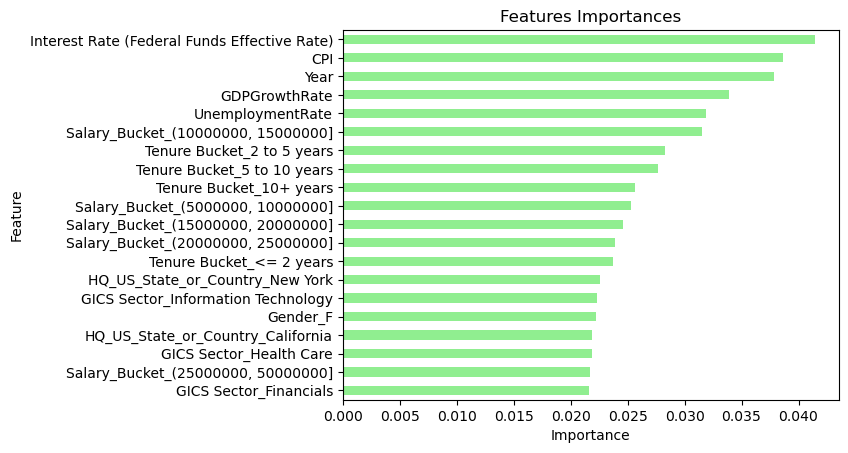

                                                          
----------------------------------------------
Confusion Matrix: RandomForestClassifier


,Predicted < SP500,Predicted > SP500
Actual < SP500,352,211
Actual > SP500,209,320


,precision,recall,f1-score,support
Less than SP500 CAGR,0.627,0.625,0.626,563.0
Outperformed SP500 CAGR,0.603,0.605,0.604,529.0
accuracy,,,0.615,
macro avg,0.615,0.615,0.615,1092.0
weighted avg,0.615,0.615,0.615,1092.0


Feature Importances for RandomForestClassifier:
0.038840: Interest Rate (Federal Funds Effective Rate)
0.037160: UnemploymentRate
0.036355: CPI
0.035573: Year
0.032675: Salary_Bucket_(10000000, 15000000]
0.028191: GDPGrowthRate
0.027281: Tenure Bucket_2 to 5 years
0.027056: Salary_Bucket_(5000000, 10000000]
0.026625: Tenure Bucket_5 to 10 years
0.026164: Tenure Bucket_10+ years
0.026114: Salary_Bucket_(15000000, 20000000]
0.024990: Tenure Bucket_<= 2 years
0.024628: HQ_US_State_or_Country_California
0.024057: GICS Sector_Information Technology
0.023718: GICS Sector_Industrials
0.022652: Salary_Bucket_(20000000, 25000000]
0.021923: GICS Sector_Financials
0.021822: Salary_Bucket_(25000000, 50000000]
0.020697: GICS Sector_Health Care
0.020622: HQ_US_State_or_Country_New York
0.020512: HQ_US_State_or_Country_Texas
0.020109: Gender_F
0.020085: CEO Transition
0.019501: GICS Sector_Consumer Discretionary
0.019060: HQ_US_State_or_Country_Illinois
0.017084: HQ_US_State_or_Country_Ohio
0.016248:

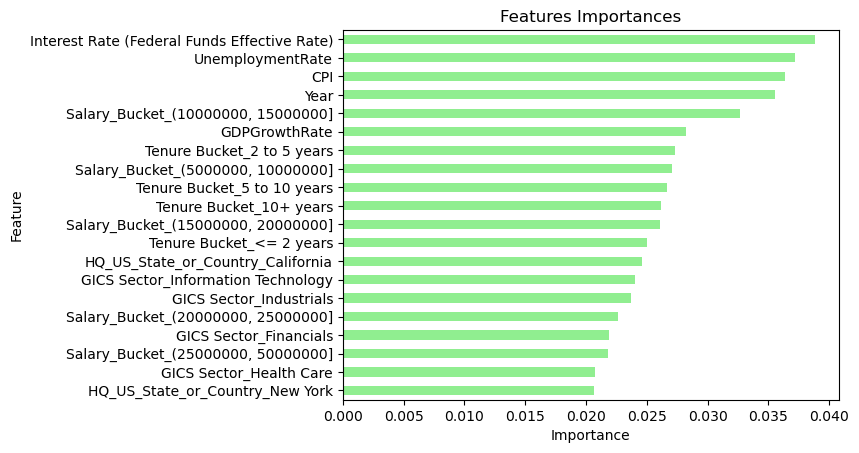

                                                          
----------------------------------------------
Confusion Matrix: BaggingClassifier


,Predicted < SP500,Predicted > SP500
Actual < SP500,350,213
Actual > SP500,205,324


,precision,recall,f1-score,support
Less than SP500 CAGR,0.631,0.622,0.626,563.0
Outperformed SP500 CAGR,0.603,0.612,0.608,529.0
accuracy,,,0.617,
macro avg,0.617,0.617,0.617,1092.0
weighted avg,0.617,0.617,0.617,1092.0


BaggingClassifier does not have feature_importances_ attribute.
                                                          


In [54]:
# Create a dictionary of different ml models to run in the loop
ml = {
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=5),
    "ExtraTreesClassifier": ensemble.ExtraTreesClassifier(n_estimators=50, random_state=78),
#     "LogisticsRegression": LogisticRegression(random_state=78, max_iter=1000),
    "RandomForestClassifier": ensemble.RandomForestClassifier(n_estimators=50, random_state=78),
    "BaggingClassifier": ensemble.BaggingClassifier(n_estimators=50, random_state=78),
#     "AdaBoostClassifier": ensemble.AdaBoostClassifier(n_estimators=100, random_state=78, algorithm='SAMME') 
}
report_data = []

for x in ml:
    model = ml[x]
    model.fit(X_train_scaled, y_train)# Create predictions
    y_pred = model.predict(X_test_scaled)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    
    # Calculating the confusion matrix and display as a dataframe
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(
        cm, index=["Actual < SP500", "Actual > SP500"], columns=["Predicted < SP500", "Predicted > SP500"]
    )
    print(f"----------------------------------------------")
    print(f"Confusion Matrix: {x}")
    display(cm_df)
    
    # Calculate report metrics
    target_names = ["Less than SP500 CAGR", "Outperformed SP500 CAGR"]
    report = classification_report(y_test, y_pred, output_dict=True, target_names=target_names)
    results = {
        "Less than SP500 CAGR": report["Less than SP500 CAGR"],
        "Outperformed SP500 CAGR": report["Outperformed SP500 CAGR"],
        "accuracy": report["accuracy"],
        "macro avg": report["macro avg"],
        "weighted avg": report["weighted avg"]
    }
    # Save report results and display as a dataframe
    report_data.append({**results})
    results_df = pd.DataFrame(results).transpose().round(3)
    results_df = results_df.astype(object)
    results_df.loc["accuracy", results_df.columns != 'f1-score'] = ""
    display(results_df)
    
    # Check if the model has feature_importances_ attribute and print if true
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        feature_names = X_columns
        sorted_importances = sorted(zip(feature_importances, feature_names), reverse=True)
        
        print(f"Feature Importances for {x}:")
        for importance, name in sorted_importances:
            if importance >= 0.01:
                print(f"{importance:.6f}: {name}")
                
         # Visualize the features by importance
        importances_df = pd.DataFrame(sorted_importances)
        importances_df.set_index(importances_df[1], inplace=True)
        importances_df.drop(columns=1, inplace=True)
        importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
        importances_sorted_df = importances_df.sort_values(by='Feature Importances', ascending=False)
        top_importances_df = importances_sorted_df.head(20)
        ax = top_importances_df.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)
        ax.invert_yaxis()
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()
                
    else:
        print(f"{x} does not have feature_importances_ attribute.")
    print("                                                          ")